In [39]:
#import statements
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json    
from collections import Counter
from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.feature_extraction import DictVectorizer
import sklearn.manifold
from sklearn.cluster import KMeans
from math import sqrt
from scipy.spatial import distance

# read input files
parsedfile = open('parsed.csv','r')
current = parsedfile.readline().strip().split(',')
current = parsedfile.readline().strip().split(',')

parsed=[]
while(current != ['']):
    parsed.append(current)
    current = parsedfile.readline().strip().split(',')

len(parsed)  

3151

In [40]:
#extract values
xvals=[]
yvals=[]
ptype=[]
prop_vals = []

for i in range(0,len(parsed)):
    xvals.append(float(parsed[i][0]))
    yvals.append(float(parsed[i][1]))
    ptype.append(int(parsed[i][2]))
    prop_vals.append(int(parsed[i][3])) 
len(yvals)

3151

In [41]:
#only get property values and information for Boston area based on latitude longitude coordinates for Boston
max_y = -70.98
min_y = -71.15
max_x = 42.4
min_x = 42.30

x_new = []
y_new = []
p_new = []
prop_new=[]
for i in range(len(parsed)):
    if (xvals[i] > min_x and xvals[i] < max_x) and (yvals[i] > min_y and yvals[i] < max_y):
        x_new.append(xvals[i])
        y_new.append(yvals[i])
        p_new.append(ptype[i]) 
        prop_new.append(prop_vals[i])
        
xvals=x_new
yvals=y_new
ptype=p_new
prop_vals=prop_new
len(xvals)

2984

In [42]:
#returns corresponding labels for building type
def getptypelabels(Ptype):
    labels = []
    for p in Ptype:
        if p == 300:
            labels.append('Hotel')
        if p == 320:
            labels.append('Retail')
        if p == 337:
            labels.append('Parking Lot')
        if p == 344:
            labels.append('Office 3-9 Story')
        if p == 357:
            labels.append('Retail Condo')
        if p == 358:
            labels.append('Office')
        if p == 359:
            labels.append('Condo Parking')
        if p == 387:
            labels.append('Pay Parking Lot')
        if p == 450:
            labels.append('Industrial Condo')
    return labels

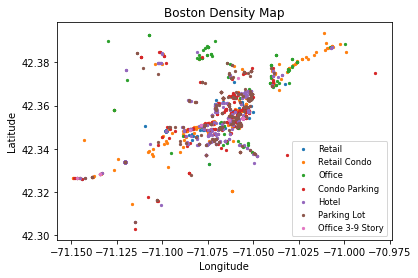

In [54]:
#plot building types in Boston area using latitude longitude coordinates
p=list(set(ptype))
p.sort()
ptype_catX = [[] for i in p]
ptype_catY = [[] for i in p]
for i in range(len(xvals)):
    for j in range(len(p)):
        if ptype[i] == p[j]:
            ptype_catX[j].append(xvals[i])
            ptype_catY[j].append(yvals[i])          

pop_indexes = []
for i in range(len(ptype_catX)):
    if len(ptype_catX[i]) >100:
        pop_indexes.append(i)
pop_ptypes = [p[i] for i in pop_indexes]

scat= []
for i in range(len(p)):
    if i in pop_indexes:
        a = plt.scatter(ptype_catY[i],ptype_catX[i], s=5)
        scat.append(a)
        
labels=getptypelabels(list(set(pop_ptypes)))
plt.title('Boston Density Map')
plt.legend(tuple(scat), tuple(labels),loc='best', fontsize='small', ncol=1)
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.show()

In [55]:
#encode longitude and latitude as values from 0 to 1
df = pd.DataFrame(xvals, columns=['Longitude'])
df['Latitude'] = pd.DataFrame(yvals)
df['Ptype'] = pd.DataFrame(ptype)

min_max_scaler = preprocessing.MinMaxScaler()
long = min_max_scaler.fit_transform(df['Longitude'].values.reshape(-1,1))
lat = min_max_scaler.fit_transform(df['Latitude'].values.reshape(-1,1))

In [56]:
# data transformation
df['Latitude'] = pd.DataFrame(lat)
df['Longitude'] = pd.DataFrame(long)

ptype_scaled = min_max_scaler.fit_transform(df['Ptype'].values.reshape(-1,1))
ptype_scaled = [2*p for p in ptype_scaled] #weight
df['Ptype'] = pd.DataFrame(ptype_scaled)
df

C:\Users\nagsu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,Longitude,Latitude,Ptype
0,0.788010,0.722392,0.327273
1,0.800807,0.733910,0.400000
2,0.797727,0.734369,0.242424
3,0.792220,0.728810,0.521212
4,0.788522,0.723163,0.521212
5,0.815193,0.728437,0.387879
6,0.814867,0.728554,0.387879
7,0.793396,0.730650,0.303030
8,0.793004,0.730037,0.303030
9,0.792612,0.729423,0.242424


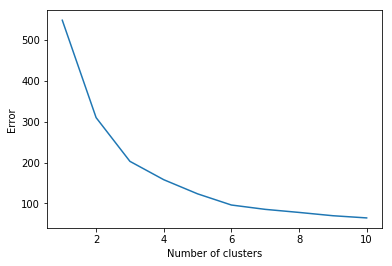

In [46]:
#cluster building types based on coordinates using a KMeans machine learning model 
error = np.zeros(11)
for k in range(1,11):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(df)
    error[k] = kmeans.inertia_
    
plt.plot(range(1,len(error)),error[1:])
plt.xlabel('Number of clusters')
graph = plt.ylabel('Error')

6
42.35573105 -71.06277325
42.3489040124609 -71.0812496818182
42.3600431 -71.0621922216736
42.333529 -71.119563
42.360267 -71.0666036244539
42.3759497 -71.042604173913
[[0.55138199 0.52102097 0.64695238]
 [0.48040613 0.41024986 0.16520852]
 [0.59637394 0.52463767 1.1323764 ]
 [0.3161261  0.18032978 0.65143098]
 [0.59871743 0.49814301 1.73484848]
 [0.76183474 0.64083069 0.35267746]]


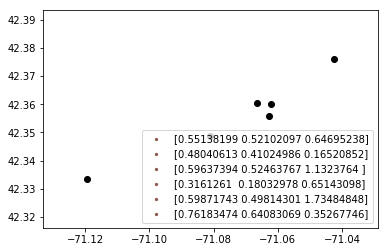

In [64]:
#KMeans model for clustering 

n_clust = 6

kmeans = KMeans(init='k-means++', n_clusters=n_clust, n_init=100)
kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
error = kmeans.inertia_

print(len(centroids))
scat= []
x_centr=[]
y_centr=[]
for val in centroids:
    xv=val[0]
    x_close = min(long, key=lambda x:abs(x-xv))
    ind = long.tolist().index(x_close)
    x = xvals[ind]
    x_centr.append(x)
    
    yv=val[1]
    y_close = min(lat, key=lambda x:abs(x-yv))
    ind = lat.tolist().index(y_close)
    y = yvals[ind]
    y_centr.append(y)
    print(x,y)
    scat.append(a)

plt.legend(tuple(scat), tuple(centroids))

print(centroids)

plt.scatter(y_centr, x_centr, alpha = 1.0, color = 'black')
plt.show()
x_close = min(long, key=lambda x:abs(x-xv))
#df['Longitude'] == min(long, key=lambda x:abs(x-xv))
ind = long.tolist().index(x_close)

The total error of the clustering is: 96.18192436350753.

Cluster labels:
[5 5 5 ... 1 1 0]

Counter({0: 1400, 1: 505, 5: 438, 3: 288, 2: 209, 4: 144})


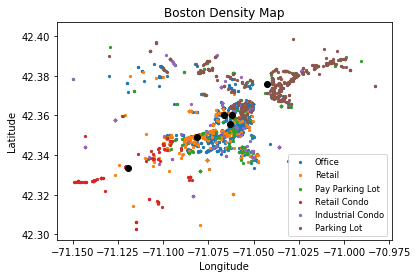

Cluster coordinates:

-71.06277325 42.35573105
-71.0812496818182 42.3489040124609
-71.0621922216736 42.3600431
-71.119563 42.333529
-71.0666036244539 42.360267
-71.042604173913 42.3759497


[358, 320, 387, 357, 450, 337]

In [65]:
#print statements
print("The total error of the clustering is: {}.".format(error))
print('\nCluster labels:')

print(labels)
num = Counter(labels)
print("\n"+str(num))

clusters = [[] for x in range(n_clust*3)]

#separate each restaurant data point by cluster and collect longitude and latitude values for each cluster
for ind in range(len(labels)):
    for j in range(n_clust):    
        if labels[ind] == j:
            clusters[j*3].append(xvals[ind])
            clusters[j*3+1].append(yvals[ind])
            clusters[j*3+2].append(ptype[ind])

scat= []
leg_ptype = []
for i in range(len(clusters)):
    if i%3 == 0:
        C = Counter(clusters[i+2])
        l=list(C.values())
        l.sort(reverse=True)
        leg_ptype.append(list(C.keys())[list(C.values()).index(l[0])])
        a = plt.scatter(clusters[i+1], clusters[i], alpha = 1.0, s=5)
        scat.append(a)

#plot cluster centroids in black on map
plt.scatter(y_centr, x_centr, alpha = 1.0, color = 'black')
plt.title('Boston Density Map')
plt.ylabel("Latitude")
plt.xlabel("Longitude")
legend = getptypelabels(leg_ptype)
    
plt.legend(tuple(scat), tuple(legend), fontsize='small')
plt.show()

print('Cluster coordinates:\n')
for i in range(n_clust):
    print(y_centr[i],x_centr[i])
    
leg_ptype

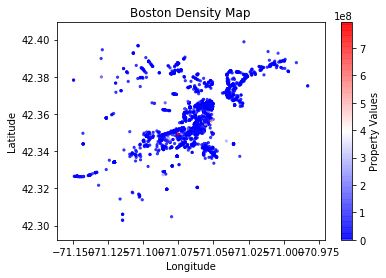

In [66]:
#plot property values on Boston map

plt.title('Boston Density Map')
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.scatter(yvals, xvals, c=prop_vals, cmap='bwr', alpha=0.7,s=5)
c = plt.colorbar()
c.set_label('Property Values') 
plt.show()
plt.show()

In [67]:
#feature extraction and encoding for property values

df['Property Values'] = pd.DataFrame(prop_vals)
min_max_scaler = preprocessing.MinMaxScaler()
prop_scaled = min_max_scaler.fit_transform(df['Property Values'].values.reshape(-1,1))
prop_scaled = [p*2 for p in prop_scaled]
df['Property Values'] = pd.DataFrame(prop_scaled)
df= df.drop('Ptype', axis=1)
df

C:\Users\nagsu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,Longitude,Latitude,Property Values
0,0.788010,0.722392,0.001764
1,0.800807,0.733910,0.002052
2,0.797727,0.734369,0.000556
3,0.792220,0.728810,0.000986
4,0.788522,0.723163,0.000476
5,0.815193,0.728437,0.000675
6,0.814867,0.728554,0.000542
7,0.793396,0.730650,0.000284
8,0.793004,0.730037,0.000625
9,0.792612,0.729423,0.004343


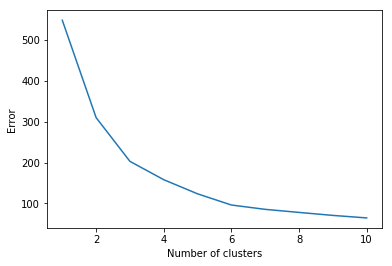

In [10]:
#plot error as clusters increases in KMeans when clustering based on property values

error = np.zeros(11)
for k in range(1,11):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(df)
    error[k] = kmeans.inertia_
    
plt.plot(range(1,len(error)),error[1:])
plt.xlabel('Number of clusters')
graph = plt.ylabel('Error')

The total error of the clustering is: 37.79665928192642.

Cluster labels:
[5 5 5 ... 2 2 2]

Counter({0: 1230, 2: 810, 5: 393, 1: 320, 4: 194, 3: 37})
42.357723137931 -71.0585636176471 218983000
42.333529 -71.121209 68915500
42.3458518 -71.0775502857143 170348500
42.352713 -71.0658712 199823500
42.3810536938775 -71.0845375961271 146008000
42.377042 -71.0312293703704 280659000


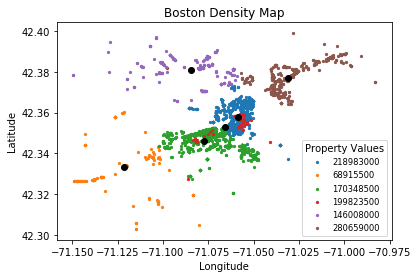

In [68]:
n_clust = 6

kmeans = KMeans(init='k-means++', n_clusters=n_clust, n_init=100)
kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
error = kmeans.inertia_

print("The total error of the clustering is: {}.".format(error))
print('\nCluster labels:')

print(labels)
num = Counter(labels)
print("\n"+str(num))

clusters = [[] for x in range(n_clust*3)]

#separate each restaurant data point by cluster and collect longitude and latitude values for each cluster
for ind in range(len(labels)):
    for j in range(n_clust):    
        if labels[ind] == j:
            clusters[j*3].append(xvals[ind])
            clusters[j*3+1].append(yvals[ind])
            clusters[j*3+2].append(prop_vals[ind])

scat= []
for i in range(len(clusters)):
    if i%3 == 0:       
        a = plt.scatter(clusters[i+1], clusters[i], alpha = 1.0, s=5)
        scat.append(a)

plt.title('Boston Density Map')
plt.ylabel("Latitude")
plt.xlabel("Longitude")

x_centr=[]
y_centr=[]
prop_centr=[]
for val in centroids:
    xv=val[0]
    x_close = min(long, key=lambda x:abs(x-xv))
    ind = long.tolist().index(x_close)
    x = xvals[ind]
    x_centr.append(x)
    
    yv=val[1]
    y_close = min(lat, key=lambda x:abs(x-yv))
    ind = lat.tolist().index(y_close)
    y = yvals[ind]
    y_centr.append(y)
    
    propv=val[1]
    prop_close = min(prop_scaled, key=lambda x:abs(x-propv))
    ind = prop_scaled.index(prop_close)
    prop = prop_vals[ind]
    prop_centr.append(prop)
    
    print(x,y, prop)
    scat.append(a)

#plot cluster centroids
plt.scatter(y_centr, x_centr, alpha = 1.0, color = 'black')
plt.legend(tuple(scat), prop_centr, title='Property Values', fontsize='small')  
plt.show()

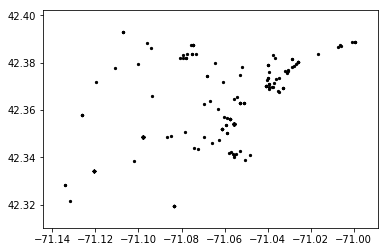

In [73]:
#plot properties where property value was less than 100,000

poor = pd.DataFrame(prop_vals, columns=['prop_vals'])
poor['Longitude'] = pd.DataFrame(xvals)
poor['Latitude'] = pd.DataFrame(yvals)
categories2 = poor['prop_vals'] < 100000
poor = poor[categories2]
poor

plt.scatter(poor['Latitude'], poor['Longitude'], alpha = 1.0, color = 'black', s=5)